In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-cricket-data-2008-2023/Ipl-clean-data2008-2023.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/ipl-cricket-data-2008-2023/Ipl-clean-data2008-2023.csv')

In [4]:
data.head(10)

,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,toss_won,decision,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,4,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,5,2023.0,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,...,"Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,6,2023.0,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,...,"Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi
3,7,2023.0,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT FIRST,...,"Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas
4,8,2023.0,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL FIRST,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),A...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Devdu...","Devdutt Padikkal,Yashasvi Jaiswal","Navdeep Saini,Adam Zampa",19 May 2023 - night match (20-over match),Nand Kishore,Rod Tucker,Navdeep Singh,Pankaj Dharmani,Parashar Joshi
5,9,2023.0,1359539,Sunrisers Hyderabad v Royal Challengers Bangalore,SRH v RCB,"65th Match (N), Indian Premier League at Hyder...",SRH,RCB,RCB,BOWL FIRST,...,"Abhishek Sharma (AR),Rahul Tripathi (UKN),Aide...","Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Virat Kohli,Faf du Plessis","Michael Bracewell,Mohammed Siraj",18 May 2023 - night match (20-over match),Bruce Oxenford,Virender Sharma,Saiyed Khalid,Javagal Srinath,VM Dhokre
6,10,2023.0,1359538,Punjab Kings v Delhi Capitals,PBKS v DC,"64th Match (N), Indian Premier League at Dhara...",PBKS,DC,PBKS,BOWL FIRST,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),A...","David Warner (UKN),Prithvi Shaw (UKN),Rilee Ro...","Rilee Rossouw,Prithvi Shaw","Anrich Nortje,Ishant Sharma",17 May 2023 - night match (20-over match),KN Ananthapadmanabhan,Saidharshan Kumar,Rod Tucker,Pankaj Dharmani,Parashar Joshi
7,11,2023.0,1359537,Lucknow Super Giants v Mumbai Indians,LSG v MI,"63rd Match (N), Indian Premier League at Luckn...",LSG,MI,MI,BOWL FIRST,...,"Deepak Hooda (AR),Quinton de Kock (WK),Prerak ...","Ishan Kishan (WK),Rohit Sharma (UKN),Suryakuma...","Ishan Kishan,Rohit Sharma","Jason Behrendorff,Piyush Chawla",16 May 2023 - night match (20-over match),Anil Chaudhary,Nand Kishore,Chris Gaffaney,Sanjay Verma,Mohit Krishnadas
8,12,2023.0,1359536,Gujarat Titans v Sunrisers Hyderabad,GT v SRH,"62nd Match (N), Indian Premier League at Ahmed...",GT,SRH,SRH,BOWL FIRST,...,"Wriddhiman Saha (WK),Shubman Gill (UKN),Sai Su...","Anmolpreet Singh (UKN),Abhishek Sharma (AR),Ai...","Heinrich Klaasen,Bhuvneshwar Kumar","Bhuvneshwar Kumar,Fazalhaq Farooqi",15 May 2023 - night match (20-over mat

In [5]:
data.tail(10)

,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,toss_won,decision,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
889,1011,2008.0,336023,Rajasthan Royals v Royal Challengers Bangalore,RR v RCB,"39th match (D/N), Indian Premier League at Jai...",RR,RCB,RCB,BOWL FIRST,...,"Graeme Smith (BT),Swapnil Asnodkar (BT),Shane ...","Jagadeesh Arunkumar (UKN),Virat Kohli (BT),Mis...","Rahul Dravid,Jacques Kallis","Anil Kumble,Praveen Kumar",17 May 2008 - day/night match (20-over match),Billy Bowden,Suresh Shastri,Steve Davis,Talat Ali,MSS Ranawat
890,1012,2008.0,336022,Delhi Daredevils v Kings XI Punjab,DC v KXIP,"40th match (N), Indian Premier League at Delhi...",DC,KXIP,DC,BAT FIRST,...,"Gautam Gambhir (BT),Virender Sehwag (BT),Shikh...","Shaun Marsh (BT),James Hopes (AR),Yuvraj Singh...","Mahela Jayawardene,Luke Pomersbach","James Hopes,Ramesh Powar",17 May 2008 - night match (20-over match),Rudi Koertzen,Arani Jayaprakash,Brian Jerling,Sir Clive Lloyd,Anil Chaudhary
891,1013,2008.0,336025,Kolkata Knight Riders v Chennai Super Kings,KKR v CSK,"41st match (D/N), Indian Premier League at Kol...",KKR,CSK,KKR,BAT FIRST,...,"Salman Butt (BT),Mohammad Hafeez (AR),Sourav G...","Parthiv Patel (BT),Stephen Fleming (BT),Vidyut...","Stephen Fleming,Parthiv Patel","Makhaya Ntini,Lakshmipathy Balaji",18 May 2008 - day/night match (20-over match),Asad Rauf,Krishna Hariharan,Amiesh Saheba,Farokh Engineer,Subrata Banerjee
892,1014,2008.0,336024,Deccan Chargers v Mumbai Indians,DC v MI,"42nd match (N), Indian Premier League at Hyder...",SRH,MI,SRH,BOWL FIRST,...,"Adam Gilchrist (WK),Shahid Afridi (AR),Rohit S...","Sanath Jayasuriya (AR),Sachin Tendulkar (BT),D...","Abhishek Nayar,Sanath Jayasuriya","Dwayne Bravo,Dilhara Fernando",18 May 2008 - night match (20-over match),Daryl Harper,Billy Doctrove,Ivaturi Shivram,Srinivas Venkataraghavan,Chettithody Shamshuddin
893,1015,2008.0,336026,Royal Challengers Bangalore v Delhi Daredevils,RCB v DC,"43rd match (N), Indian Premier League at Benga...",RCB,DC,DC,BOWL FIRST,...,"Jacques Kallis (AR),Bharat Chipli (BT),Shreeva...","Gautam Gambhir (BT),Virender Sehwag (BT),AB de...","Virender Sehwag,Gautam Gambhir","Farveez Maharoof,Glenn McGrath",19 May 2008 - night match (20-over match),Steve Davis,GA Pratapkumar,Suresh Shastri,Talat Ali,Vinayak Kulkarni
894,1016,2008.0,336027,Kolkata Knight Riders v Rajasthan Royals,KKR v RR,"44th match (N), Indian Premier League at Kolka...",KKR,RR,RR,BOWL FIRST,...,"Salman Butt (BT),Mohammad Hafeez (AR),Sourav G...","Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...","Yusuf Pathan,Mohammad Kaif","Sohail Tanvir,Munaf Patel",20 May 2008 - night match (20-over match),Rudi Koertzen,Brian Jerling,Krishna Hariharan,Farokh Engineer,Abhik Mitra
895,1018,2008.0,336029,Chennai Super Kings v Royal Challengers Bangalore,CSK v RCB,"46th match (N), Indian Premier League at Chenn...",CSK,RCB,RCB,BAT FIRST,...,"Parthiv Patel (WK),Stephen Fleming (BT),MS Dho...","Jacques Kallis (AR),Shreevats Goswami (BT),Vir...","Rahul Dravid,Praveen Kumar","Anil Kumble,Dale Steyn",21 May 2008 - night match (20-over match),Daryl Harper,Ivaturi Shivram,Billy Doctrove,Javagal Srinath,Sundaram Ravi
896,1020,2008.0,336031,Kings XI Punjab v Deccan Chargers,KXIP v DC,"48th match (N), Indian Premier League at Mohal...",KXIP,SRH,KXIP,BOWL FIRST,...,"Shaun Marsh (BT),Kumar Sangakkara (WK),Yuvraj ...","Adam Gilchrist (WK),Herschelle Gibbs (UKN),Roh...","Rohit Sharma,Adam Gilchrist","Pragyan Ojha,Rohit Sharma",23 May 2008 - night match (20-over match),Asad Rauf,Steve Davis,Amiesh Saheba,Talat Ali,Sekhon
897,1025,2008.0,336036,Rajasthan Royals v Mumbai Indians,RR v MI,"53rd match (N), Indian Premier League at Jaipu...",RR,MI,RR,BOWL FIRST,...,"Kamran Akmal (WK),Swapnil Asnodkar (BT),Yusuf ...","Sanath Jayasuriya (AR),Sachin Tendulkar (BT),A...","Sanath Jayasuriya,Sachin Tendulkar","Dilhara Fernando,Rohan Raje",26 May 2008 - night 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        899 non-null    int64  
 1   season            899 non-null    float64
 2   id                899 non-null    int64  
 3   name              899 non-null    object 
 4   short_name        899 non-null    object 
 5   description       899 non-null    object 
 6   home_team         899 non-null    object 
 7   away_team         899 non-null    object 
 8   toss_won          899 non-null    object 
 9   decision          899 non-null    object 
 10  1st_inning_score  899 non-null    object 
 11  2nd_inning_score  899 non-null    object 
 12  winner            899 non-null    object 
 13  result            899 non-null    object 
 14  start_date        899 non-null    object 
 15  end_date          899 non-null    object 
 16  venue_id          899 non-null    int64  
 1

In [7]:
data_cleaned = data.drop(columns=['Unnamed: 0'])

In [8]:
data_cleaned

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,197/5,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,2023.0,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,200/5,...,"Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,2023.0,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,176/8,...,"Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi
3,2023.0,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT FIRST,223/3,...,"Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas
4,2023.0,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL FIRST,187/5,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),A...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Devdu...","Devdutt Padikkal,Yashasvi Jaiswal","Navdeep Saini,Adam Zampa",19 May 2023 - night match (20-over match),Nand Kishore,Rod Tucker,Navdeep Singh,Pankaj Dharmani,Parashar Joshi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2008.0,336027,Kolkata Knight Riders v Rajasthan Royals,KKR v RR,"44th match (N), Indian Premier League at Kolka...",KKR,RR,RR,BOWL FIRST,147/8,...,"Salman Butt (BT),Mohammad Hafeez (AR),Sourav G...","Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...","Yusuf Pathan,Mohammad Kaif","Sohail Tanvir,Munaf Patel",20 May 2008 - night match (20-over match),Rudi Koertzen,Brian Jerling,Krishna Hariharan,Farokh Engineer,Abhik Mitra
895,2008.0,336029,Chennai Super Kings v Royal Challengers Bangalore,CSK v RCB,"46th match (N), Indian Premier League at Chenn...",CSK,RCB,RCB,BAT FIRST,126/8,...,"Parthiv Patel (WK),Stephen Fleming (BT),MS Dho...","Jacques Kallis (AR),Shreevats Goswami (BT),Vir...","Rahul Dravid,Praveen Kumar","Anil Kumble,Dale Steyn",21 May 2008 - night match (20-over match),Daryl Harper,Ivaturi Shivram,Billy Doctrove,Javagal Srinath,Sundaram Ravi
896,2008.0,336031,Kings XI Punjab v Deccan Chargers,KXIP v DC,"48th match (N), Indian Premier League at Mohal...",KXIP,SRH,KXIP,BOWL FIRST,175/4,...,"Shaun Marsh (BT),Kumar Sangakkara (WK),Yuvraj ...","Adam Gilchrist (WK),Herschelle Gibbs (UKN),Roh...","Rohit Sharma,Adam Gilchrist","Pragyan Ojha,Rohit Sharma",23 May 2008 - night match (20-over match),Asad Rauf,Steve Davis,Amiesh Saheba,Talat Ali,Sekhon
897,2008.0,336036,Rajasthan Royals v Mumbai Indians,RR v MI,"53rd match (N), Indian Premier League at Jaipu...",RR,MI,RR,BOWL FIRST,145/7,...,"Kamran Akmal (WK),Swapnil Asnodkar (BT),Yusuf ...","Sanath Jayasuriya (AR),Sachin Tendulkar (BT),A...","Sanath Jayasuriya,Sa

In [10]:
data_cleaned_unique = data_cleaned.drop_duplicates()

In [11]:
data_cleaned_unique

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,197/5,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,2023.0,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,200/5,...,"Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,2023.0,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,176/8,...,"Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi
3,2023.0,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT FIRST,223/3,...,"Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas
4,2023.0,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL FIRST,187/5,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),A...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Devdu...","Devdutt Padikkal,Yashasvi Jaiswal","Navdeep Saini,Adam Zampa",19 May 2023 - night match (20-over match),Nand Kishore,Rod Tucker,Navdeep Singh,Pankaj Dharmani,Parashar Joshi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,2008.0,336027,Kolkata Knight Riders v Rajasthan Royals,KKR v RR,"44th match (N), Indian Premier League at Kolka...",KKR,RR,RR,BOWL FIRST,147/8,...,"Salman Butt (BT),Mohammad Hafeez (AR),Sourav G...","Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...","Yusuf Pathan,Mohammad Kaif","Sohail Tanvir,Munaf Patel",20 May 2008 - night match (20-over match),Rudi Koertzen,Brian Jerling,Krishna Hariharan,Farokh Engineer,Abhik Mitra
895,2008.0,336029,Chennai Super Kings v Royal Challengers Bangalore,CSK v RCB,"46th match (N), Indian Premier League at Chenn...",CSK,RCB,RCB,BAT FIRST,126/8,...,"Parthiv Patel (WK),Stephen Fleming (BT),MS Dho...","Jacques Kallis (AR),Shreevats Goswami (BT),Vir...","Rahul Dravid,Praveen Kumar","Anil Kumble,Dale Steyn",21 May 2008 - night match (20-over match),Daryl Harper,Ivaturi Shivram,Billy Doctrove,Javagal Srinath,Sundaram Ravi
896,2008.0,336031,Kings XI Punjab v Deccan Chargers,KXIP v DC,"48th match (N), Indian Premier League at Mohal...",KXIP,SRH,KXIP,BOWL FIRST,175/4,...,"Shaun Marsh (BT),Kumar Sangakkara (WK),Yuvraj ...","Adam Gilchrist (WK),Herschelle Gibbs (UKN),Roh...","Rohit Sharma,Adam Gilchrist","Pragyan Ojha,Rohit Sharma",23 May 2008 - night match (20-over match),Asad Rauf,Steve Davis,Amiesh Saheba,Talat Ali,Sekhon
897,2008.0,336036,Rajasthan Royals v Mumbai Indians,RR v MI,"53rd match (N), Indian Premier League at Jaipu...",RR,MI,RR,BOWL FIRST,145/7,...,"Kamran Akmal (WK),Swapnil Asnodkar (BT),Yusuf ...","Sanath Jayasuriya (AR),Sachin Tendulkar (BT),A...","Sanath Jayasuriya,Sa

In [12]:
data_cleaned_unique.describe()

,season,id,venue_id,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries
count,899.000000,8.990000e+02,8.990000e+02,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,2015.729700,8.782062e+05,1.266364e+05,19.116240,158.746385,5.751947,19.484983,19.086318,155.814238,5.905451,19.071190
std,4.596323,3.501428e+05,1.660742e+05,2.008041,31.665220,2.390051,5.903506,2.072742,31.238539,2.511657,5.692124
min,2008.000000,3.359820e+05,5.785100e+04,4.500000,58.000000,0.000000,3.000000,4.200000,44.000000,0.000000,4.000000
25%,2012.000000,5.483265e+05,5.799100e+04,19.200000,138.500000,4.000000,15.000000,19.200000,136.000000,4.000000,15.000000
50%,2015.000000,8.298150e+05,5.815000e+04,20.000000,160.000000,6.000000,19.000000,20.000000,158.000000,6.000000,19.000000
75%,2020.000000,1.216510e+06,5.909350e+04,20.000000,180.000000,8.000000,24.000000,20.000000,176.000000,8.000000,23.000000
max,2023.000000,1.359544e+06,1.070094e+06,20.000000,263.000000,10.000000,42.000000,20.000000,257.000000,10.000000,41.000000


Data Visualization

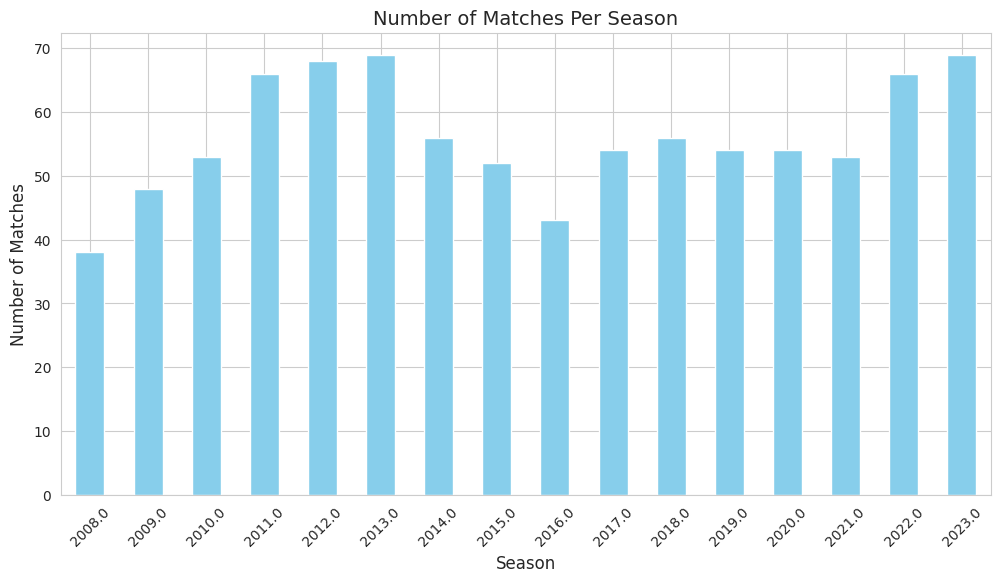

In [13]:
# Number of Matches Per Season

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Count the number of matches per season
matches_per_season = data_cleaned_unique['season'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
matches_per_season.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Per Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [15]:
data_cleaned_unique.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'winner', 'result', 'start_date', 'end_date',
       'venue_id', 'venue_name', 'home_captain', 'away_captain', 'pom',
       'points', 'super_over', 'home_overs', 'home_runs', 'home_wickets',
       'home_boundaries', 'away_overs', 'away_runs', 'away_wickets',
       'away_boundaries', 'highlights', 'home_key_batsman', 'home_key_bowler',
       'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler',
       'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee',
       'reserve_umpire'],
      dtype='object')

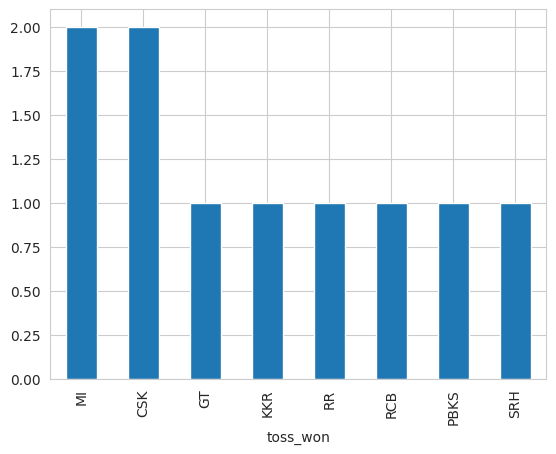

In [16]:
# Barchart

data_cleaned_unique['toss_won'].head(10).value_counts().plot(kind='bar')
plt.show()

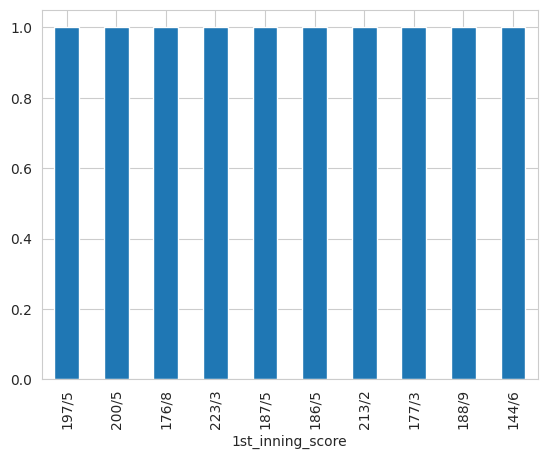

In [17]:
data_cleaned_unique['1st_inning_score'].head(10).value_counts().plot(kind='bar')
plt.show()

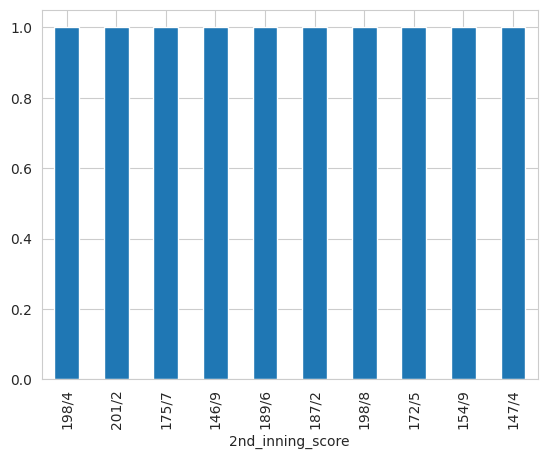

In [18]:
data_cleaned_unique['2nd_inning_score'].head(10).value_counts().plot(kind='bar')
plt.show()

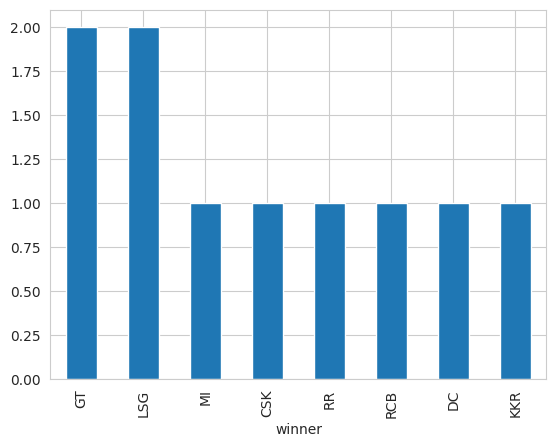

In [19]:
data_cleaned_unique['winner'].head(10).value_counts().plot(kind='bar')
plt.show()

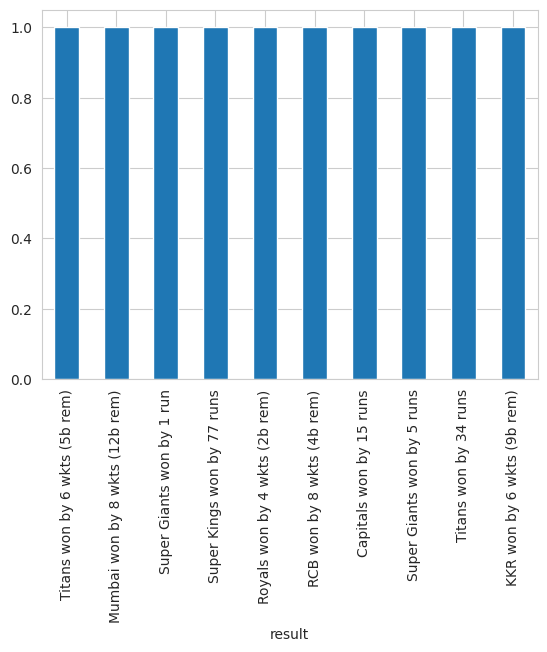

In [20]:
data_cleaned_unique['result'].head(10).value_counts().plot(kind='bar')
plt.show()

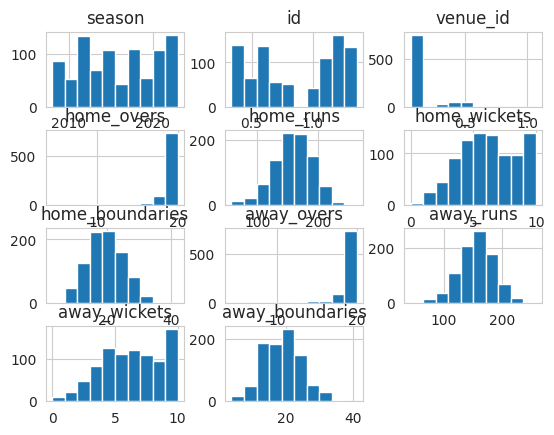

In [22]:
# histograms
data_cleaned_unique.hist()
plt.show()